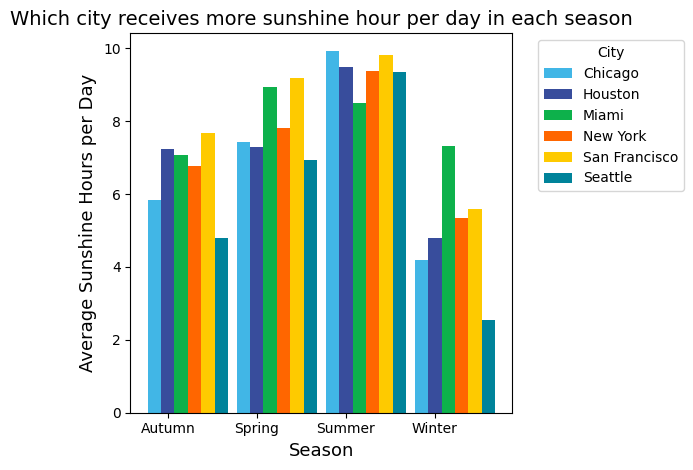

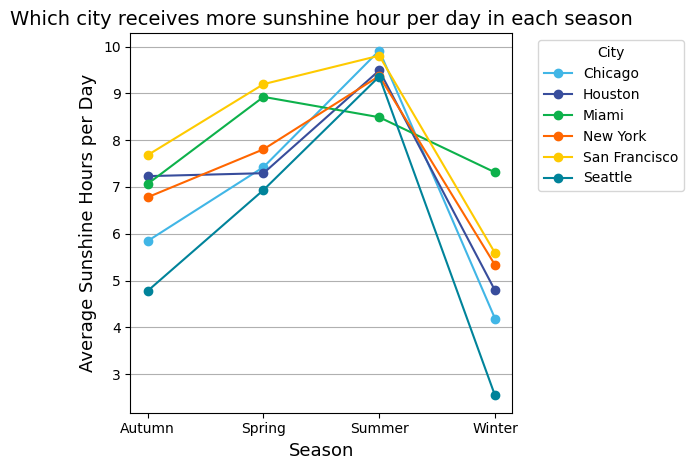

             city  season  sunshine  sunshine_hour_day
0         Chicago  Autumn       532           5.846154
1         Chicago  Spring       683           7.423913
2         Chicago  Summer       912           9.913043
3         Chicago  Winter       377           4.188889
4         Houston  Autumn       658           7.230769
5         Houston  Spring       671           7.293478
6         Houston  Summer       873           9.489130
7         Houston  Winter       431           4.788889
8           Miami  Autumn       643           7.065934
9           Miami  Spring       821           8.923913
10          Miami  Summer       781           8.489130
11          Miami  Winter       658           7.311111
12       New York  Autumn       617           6.780220
13       New York  Spring       718           7.804348
14       New York  Summer       862           9.369565
15       New York  Winter       480           5.333333
16  San Francisco  Autumn       699           7.681319
17  San Fr

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./climate_data/climate.csv")
# print(data)

season_days = {
    'Spring': 92,   # Mar: 31, Apr: 30, May: 31 days
    'Summer': 92,   # Jun: 30, Jul: 31, Aug:31 days
    'Autumn': 91,   # Sep: 30, Oct: 31, Nov: 30 days
    'Winter': 90    # Dec: 31, Jan: 31, Feb:28 days
}

season_month = {
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Autumn', 'Oct': 'Autumn', 'Nov': 'Autumn',
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'
}

city_color = {
    'Chicago': (65/255, 182/255, 230/255),      # CHicago flag color
    'Houston': (56/255, 77/255, 156/255),       # Houston flag color
    'Miami': (13/255, 177/255, 75/255),         # Miami flag color
    'New York': (255/255, 102/255, 0/255),      # NYC flag color
    'San Francisco': (254/255, 202/255, 0/255), # SF flag color
    'Seattle': (0/255, 131/255, 154/255)        # Seattle flag color
}

data['season'] = data['month'].map(season_month)

season_data = data.groupby(['city', 'season'])['sunshine'].sum().reset_index()
season_data['sunshine_hour_day'] = season_data.apply(
    lambda row: row['sunshine'] / season_days[row['season']], axis=1)
# print(season_data)

# Bar chart
cities = season_data['city'].unique()
bar_width = 0.15
x = range(len(season_data['season'].unique()))

for i, city in enumerate(cities):
    city_data = season_data[season_data['city'] == city]
    plt.bar(
        [pos + i * bar_width for pos in x],
        city_data['sunshine_hour_day'],
        width=bar_width,
        label=city,
        color=city_color[city]
    )

plt.title('Which city receives more sunshine hour per day in each season', fontsize=14)
plt.xlabel('Season', fontsize=13)
plt.ylabel('Average Sunshine Hours per Day', fontsize=13)
plt.xticks([pos + bar_width for pos in x], season_data['season'].unique())
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Line chart
plot_data = season_data.pivot(index='season', columns='city', values='sunshine_hour_day')
for city in plot_data.columns:
    plt.plot(plot_data.index, plot_data[city], marker='o', label=city, color=city_color[city])

plt.title('Which city receives more sunshine hour per day in each season', fontsize=14)
plt.xlabel('Season', fontsize=13)
plt.ylabel('Average Sunshine Hours per Day', fontsize=13)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

print(season_data)